c:\Users\User\M1ES\ML_ProjectM1\envproject\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Bibliothèques importées
📊 Dataset chargé : (73111, 38)

🔍 Aperçu des colonnes :
['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'dist_relative', 'bathrooms_qty', 'instant_bookable_num', 'has_ac', 'has_elevator', 'has_dishwasher', 'has_parking', 'score_luxury', 'score_tech', 'pg_Entire Unit', 'pg_Hotel', 'pg_Other', 'pg_Private Room', 'rt_Entire home/apt', 'rt_Hotel room', 'rt_Private room', 'rt_Shared room', 'neigh_price_index', 'target_class', 'city_label']

✅ Target trouvée : 4 classes
target_class
0    19114
1    17449
2    18299
3    18249
Name: count, dtype: int64

📋 Aperçu des 5 premières lignes :
   accommodates  bedrooms      beds  minimum_nights  maxi

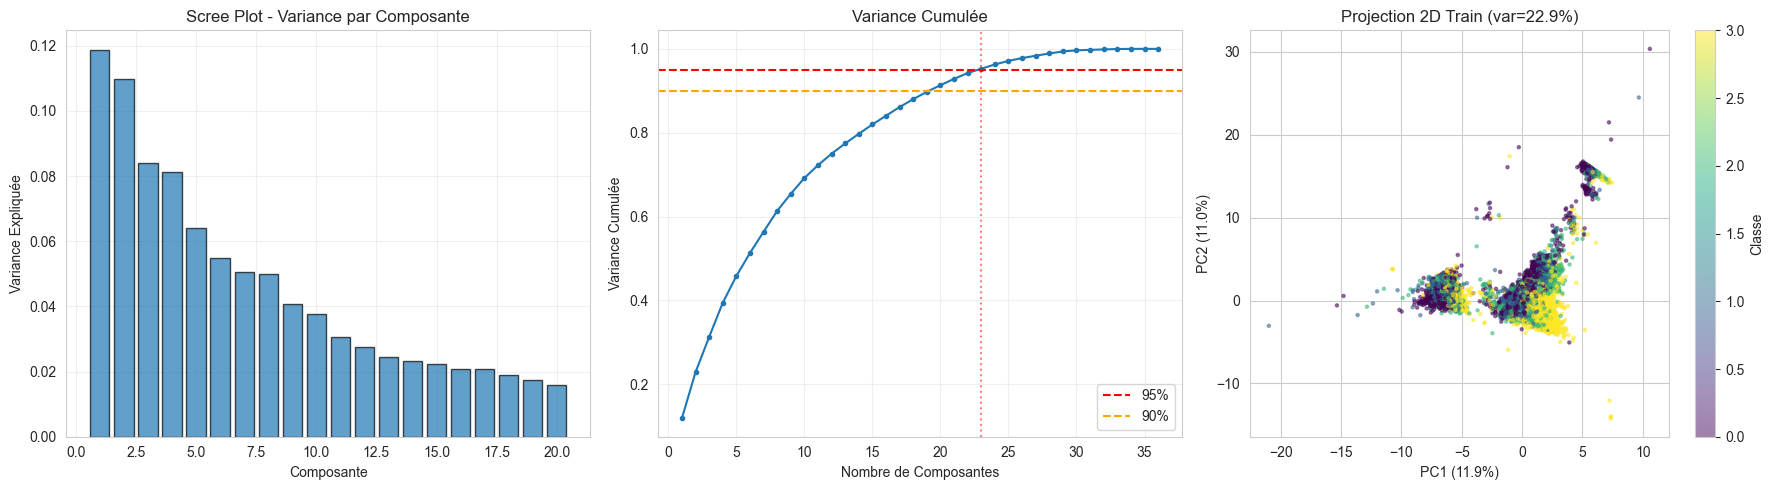


📌 Top 10 Features PC1 :
               feature  loading
    rt_Entire home/apt 0.447006
        pg_Entire Unit 0.446680
       rt_Private room 0.418331
       pg_Private Room 0.367880
              pg_Hotel 0.227200
          accommodates 0.178322
minimum_nights_avg_ntm 0.147845
        minimum_nights 0.144114
minimum_minimum_nights 0.142928
maximum_minimum_nights 0.139011

MÉTHODE 2 : UMAP (Uniform Manifold Approximation)
⚠️ Sous-échantillonnage pour UMAP : 10000 samples
🔄 Calcul UMAP (30-60 secondes)...


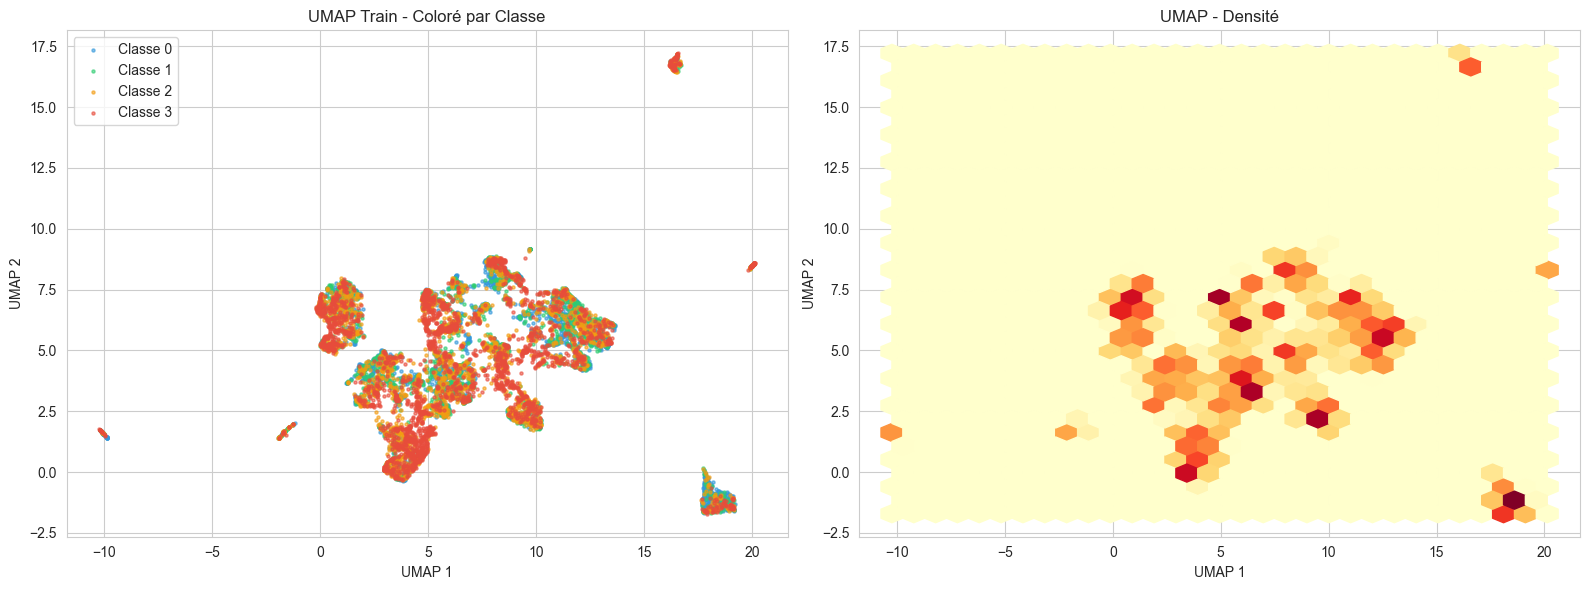

✅ UMAP révèle la structure non-linéaire des données

MÉTHODE 3 : LDA (Linear Discriminant Analysis)
Dimensions réduites : 36 → 3
Variance expliquée : [0.91705187 0.07624723 0.0067009 ]


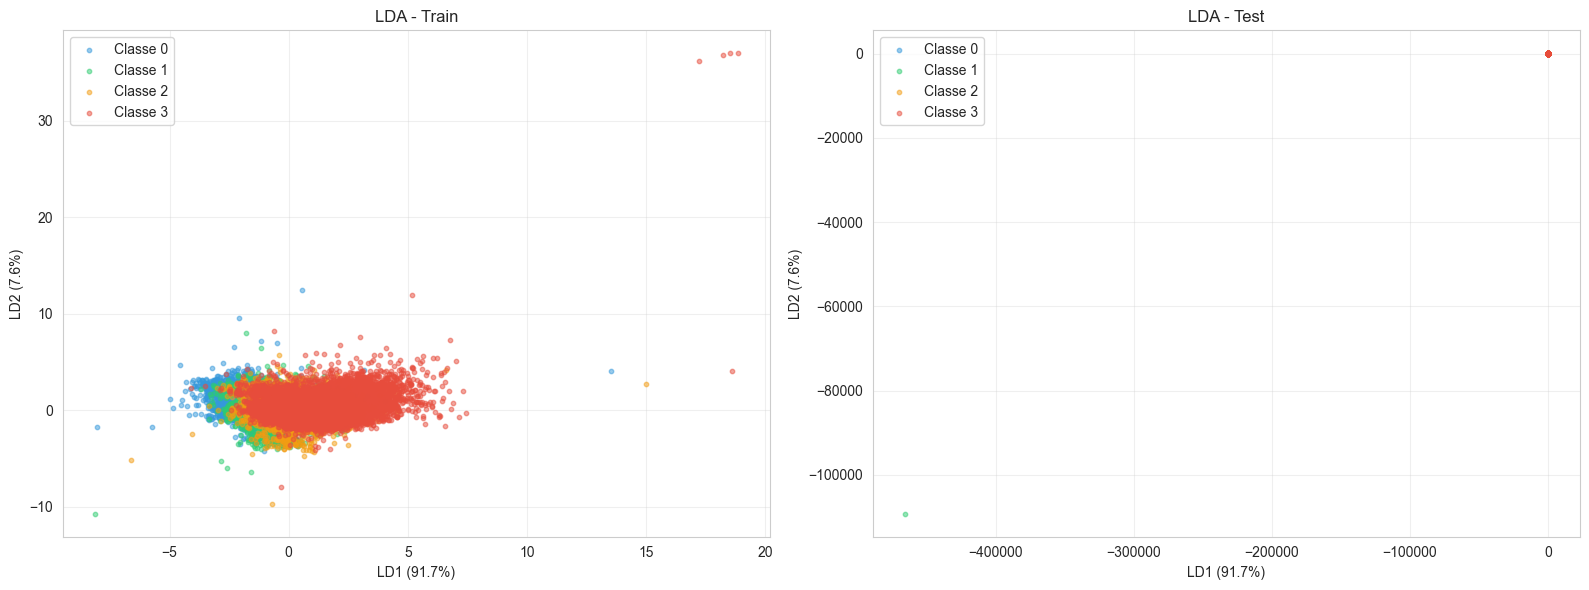

✅ LDA trouve les axes discriminants

MÉTHODE 4 : CART (Classification Tree)
🌳 Entraînement CART...

📊 Performance CART :
              precision    recall  f1-score   support

         Bas       0.55      0.62      0.59      3823
   Moyen-Bas       0.36      0.34      0.35      3490
  Moyen-Haut       0.39      0.38      0.39      3660
        Haut       0.64      0.61      0.62      3650

    accuracy                           0.49     14623
   macro avg       0.49      0.49      0.49     14623
weighted avg       0.49      0.49      0.49     14623



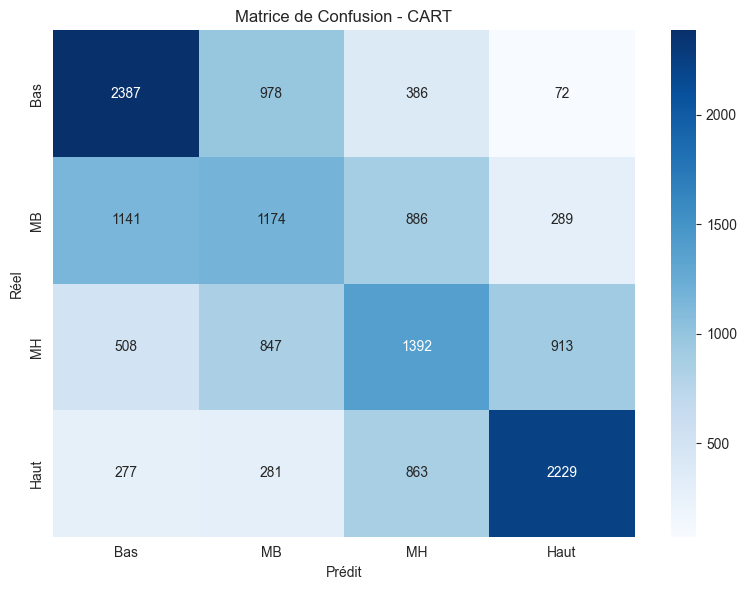


📌 Top 15 Features CART :
               feature  importance
              bedrooms    0.465230
     neigh_price_index    0.131223
          accommodates    0.083309
         bathrooms_qty    0.080240
 number_of_reviews_ltm    0.074567
minimum_minimum_nights    0.047476
        has_dishwasher    0.035844
     number_of_reviews    0.028091
        minimum_nights    0.016484
minimum_nights_avg_ntm    0.016361
        pg_Entire Unit    0.012783
         dist_relative    0.006060
        maximum_nights    0.001457
                has_ac    0.000875
                  beds    0.000000


<Figure size 1000x600 with 0 Axes>

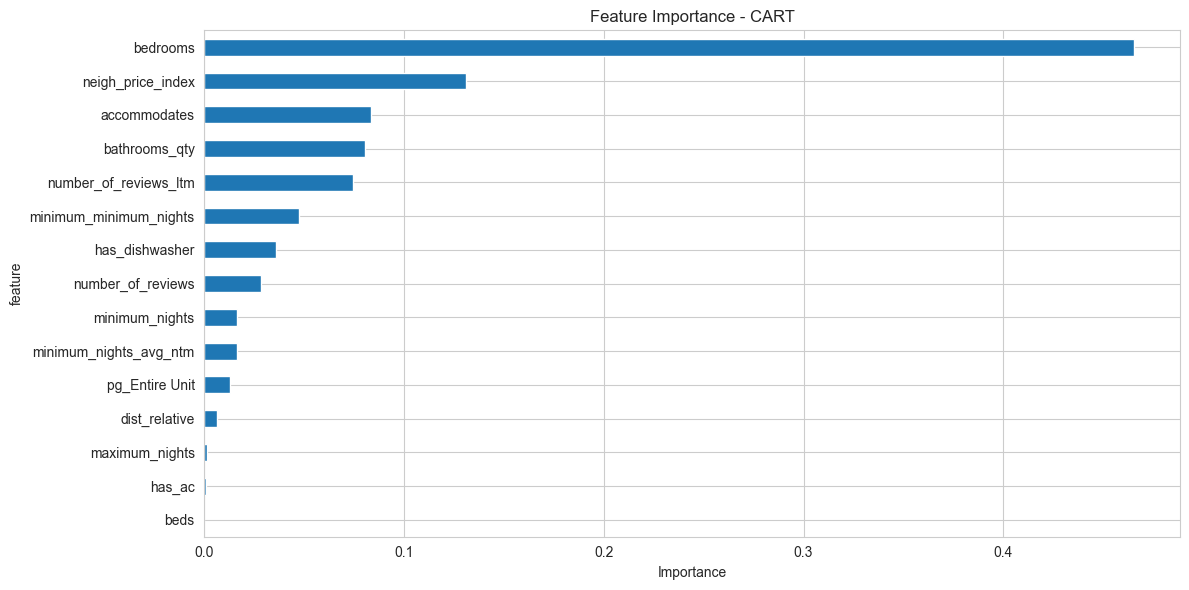

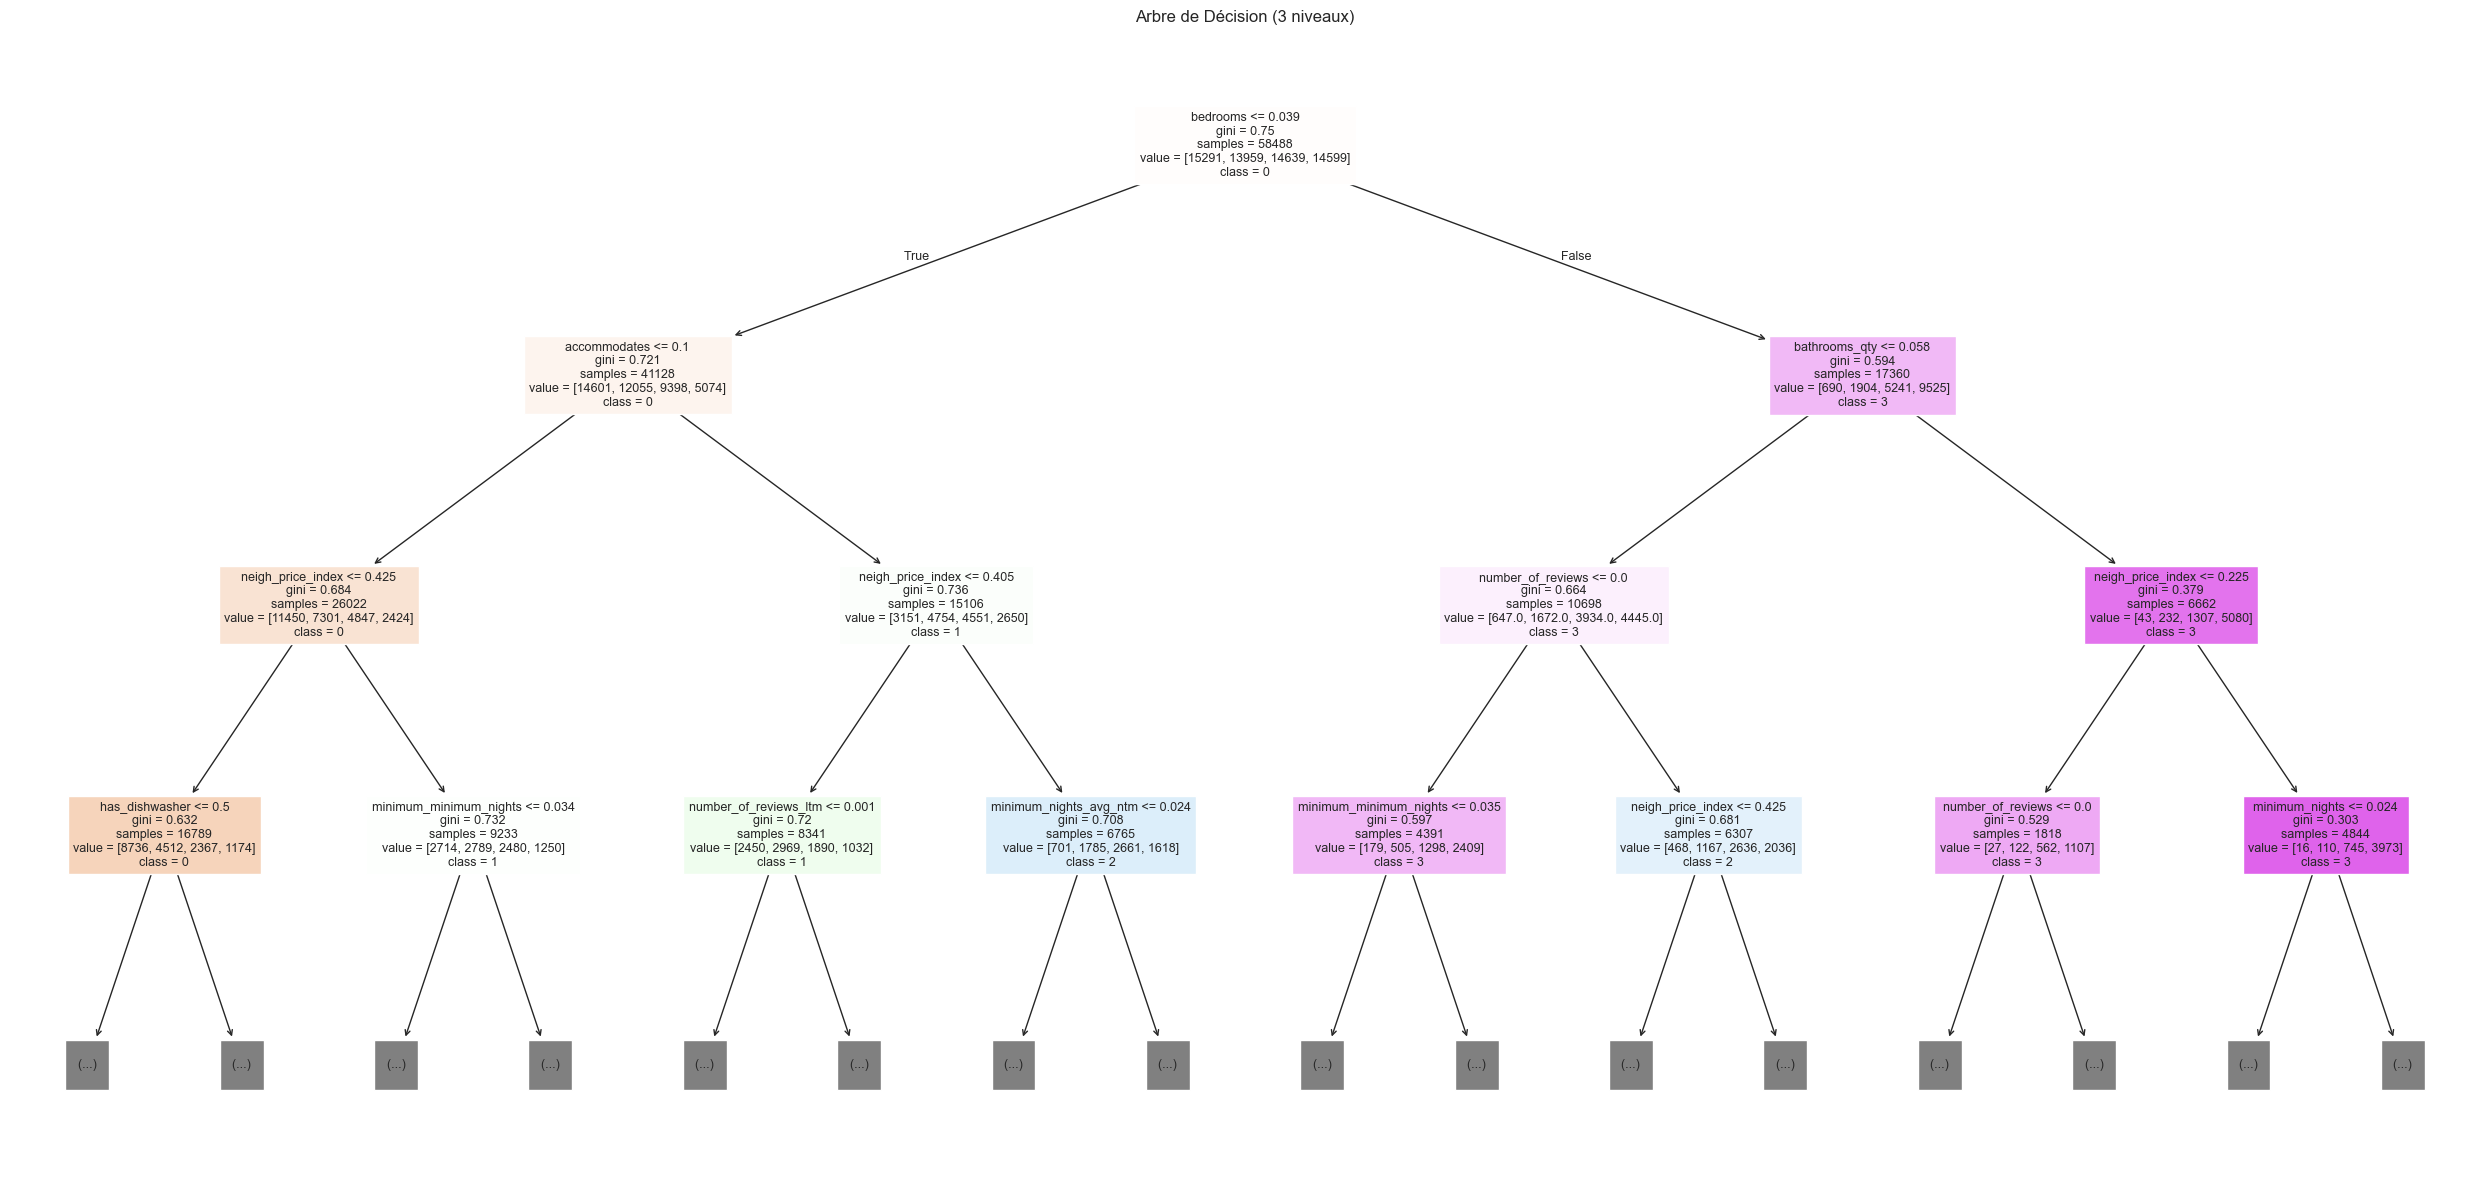


🎯 Accuracy CART : 0.4911

MÉTHODE 5 : Bootstrap (Estimation de Variance)
🔄 100 itérations bootstrap...
  ✓ 20/100
  ✓ 40/100
  ✓ 60/100
  ✓ 80/100


In [ ]:
# %% [markdown]
# # ML Baseline Paris - Application des 7 Méthodes du Cours
# 
# **Objectif** : Tester les 7 méthodes sur le dataset Paris pré-traité
# 
# Les données sont déjà :
# - Nettoyées et normalisées
# - Encodées (one-hot, amenities, etc.)
# - Avec target_class créée (quartiles de prix)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("✅ Bibliothèques importées")

# %% [markdown]
# ## 1. Chargement des Données (Déjà pré-traitées)

# %%
# Chargement du dataset final (déjà normalisé et encodé)
df = pd.read_csv('data/dataset_paris_processed.csv.gz', compression='gzip')

print(f"📊 Dataset chargé : {df.shape}")
print(f"\n🔍 Aperçu des colonnes :")
print(df.columns.tolist())

# Vérification target
if 'target_class' in df.columns:
    print(f"\n✅ Target trouvée : {df['target_class'].nunique()} classes")
    print(df['target_class'].value_counts().sort_index())
else:
    print("⚠️ Attention : 'target_class' non trouvée dans le dataset")

# Aperçu
print(f"\n📋 Aperçu des 5 premières lignes :")
print(df.head())

# %% [markdown]
# ## 2. Préparation X/y et Train/Test Split

# %%
print("=" * 60)
print("PRÉPARATION : Séparation X/y et Train/Test Split")
print("=" * 60)

# Séparation X (features) et y (target)
y = df['target_class']
X = df.drop(columns=['target_class'])

# Supprimer city_label si présent
if 'city_label' in X.columns:
    X = X.drop(columns=['city_label'])

print(f"\nFeatures (X) : {X.shape[1]} colonnes")
print(f"Target (y) : {len(y)} valeurs")
print(f"\nDistribution des classes :")
print(y.value_counts().sort_index())

# Split 80/20 stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f"\n✅ Split effectué :")
print(f"  Train : {X_train.shape}")
print(f"  Test  : {X_test.shape}")
print(f"\nDistribution Train :")
print(y_train.value_counts().sort_index())
print(f"\nDistribution Test :")
print(y_test.value_counts().sort_index())

# %% [markdown]
# ## 3. MÉTHODE 1 : PCA - Analyse Exploratoire

# %%
print("\n" + "=" * 60)
print("MÉTHODE 1 : PCA (Principal Component Analysis)")
print("=" * 60)

# Standardisation pour PCA (données déjà normalisées mais on re-standardise pour PCA)
scaler_pca = StandardScaler()
X_train_std = scaler_pca.fit_transform(X_train)
X_test_std = scaler_pca.transform(X_test)

# PCA complète
pca_full = PCA()
pca_full.fit(X_train_std)

# Variance expliquée
var_exp = pca_full.explained_variance_ratio_
var_cum = np.cumsum(var_exp)

# Nombre de composantes
n_comp_95 = np.argmax(var_cum >= 0.95) + 1
n_comp_90 = np.argmax(var_cum >= 0.90) + 1

print(f"\n📊 Résultats PCA :")
print(f"  • Composantes pour 90% variance : {n_comp_90}/{X.shape[1]}")
print(f"  • Composantes pour 95% variance : {n_comp_95}/{X.shape[1]}")
print(f"  • Réduction possible : {(1 - n_comp_95/X.shape[1])*100:.1f}%")

# Visualisations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Scree plot
axes[0].bar(range(1, min(21, len(var_exp)+1)), var_exp[:20], alpha=0.7, edgecolor='black')
axes[0].set_title("Scree Plot - Variance par Composante")
axes[0].set_xlabel("Composante")
axes[0].set_ylabel("Variance Expliquée")
axes[0].grid(alpha=0.3)

# 2. Variance cumulée
axes[1].plot(range(1, len(var_cum)+1), var_cum, marker='o', markersize=3)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95%')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90%')
axes[1].axvline(x=n_comp_95, color='r', linestyle=':', alpha=0.5)
axes[1].set_title("Variance Cumulée")
axes[1].set_xlabel("Nombre de Composantes")
axes[1].set_ylabel("Variance Cumulée")
axes[1].legend()
axes[1].grid(alpha=0.3)

# 3. Projection 2D
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_std)
scatter = axes[2].scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], 
                         c=y_train, cmap='viridis', s=5, alpha=0.5)
axes[2].set_title(f"Projection 2D Train (var={pca_2d.explained_variance_ratio_.sum():.1%})")
axes[2].set_xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})")
axes[2].set_ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})")
plt.colorbar(scatter, ax=axes[2], label='Classe')

plt.tight_layout()
plt.show()

# Feature importance PC1
pc1_loadings = pd.DataFrame({
    'feature': X.columns,
    'loading': np.abs(pca_full.components_[0])
}).sort_values('loading', ascending=False)

print(f"\n📌 Top 10 Features PC1 :")
print(pc1_loadings.head(10).to_string(index=False))

# %% [markdown]
# ## 4. MÉTHODE 2 : UMAP - Visualisation Non-Linéaire

# %%
print("\n" + "=" * 60)
print("MÉTHODE 2 : UMAP (Uniform Manifold Approximation)")
print("=" * 60)

# UMAP sur train (sous-échantillon si trop volumineux)
sample_size = min(10000, len(X_train))
if len(X_train) > sample_size:
    print(f"⚠️ Sous-échantillonnage pour UMAP : {sample_size} samples")
    indices = np.random.choice(len(X_train), sample_size, replace=False)
    X_train_sample = X_train_std[indices]
    y_train_sample = y_train.iloc[indices]
else:
    X_train_sample = X_train_std
    y_train_sample = y_train

print("🔄 Calcul UMAP (30-60 secondes)...")
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42, verbose=False)
embedding_train = reducer.fit_transform(X_train_sample)

# Visualisations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Coloré par classe
colors_class = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
for classe in range(4):
    mask = y_train_sample == classe
    axes[0].scatter(embedding_train[mask, 0], embedding_train[mask, 1], 
                   c=colors_class[classe], label=f'Classe {classe}', s=5, alpha=0.6)
axes[0].set_title("UMAP Train - Coloré par Classe")
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")
axes[0].legend()

# Densité
axes[1].hexbin(embedding_train[:, 0], embedding_train[:, 1], gridsize=30, cmap='YlOrRd')
axes[1].set_title("UMAP - Densité")
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.show()

print("✅ UMAP révèle la structure non-linéaire des données")

# %% [markdown]
# ## 5. MÉTHODE 3 : LDA - Linear Discriminant Analysis

# %%
print("\n" + "=" * 60)
print("MÉTHODE 3 : LDA (Linear Discriminant Analysis)")
print("=" * 60)

# LDA (max 3 composantes pour 4 classes)
lda = LinearDiscriminantAnalysis(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print(f"Dimensions réduites : {X_train.shape[1]} → {X_train_lda.shape[1]}")
print(f"Variance expliquée : {lda.explained_variance_ratio_}")

# Visualisation 2D
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, (X_lda, y_set, title) in zip(axes, 
    [(X_train_lda, y_train, 'Train'), (X_test_lda, y_test, 'Test')]):
    
    for classe in range(4):
        mask = y_set == classe
        ax.scatter(X_lda[mask, 0], X_lda[mask, 1], 
                  c=colors_class[classe], label=f'Classe {classe}', alpha=0.5, s=10)
    
    ax.set_title(f"LDA - {title}")
    ax.set_xlabel(f"LD1 ({lda.explained_variance_ratio_[0]:.1%})")
    ax.set_ylabel(f"LD2 ({lda.explained_variance_ratio_[1]:.1%})")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ LDA trouve les axes discriminants")

# %% [markdown]
# ## 6. MÉTHODE 4 : CART - Classification Tree

# %%
print("\n" + "=" * 60)
print("MÉTHODE 4 : CART (Classification Tree)")
print("=" * 60)

# Arbre simple
cart = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42
)

print("🌳 Entraînement CART...")
cart.fit(X_train, y_train)

# Prédictions
y_pred_cart = cart.predict(X_test)

# Métriques
print("\n📊 Performance CART :")
print(classification_report(y_test, y_pred_cart, 
                          target_names=['Bas', 'Moyen-Bas', 'Moyen-Haut', 'Haut'],
                          zero_division=0))

# Matrice de confusion
cm_cart = confusion_matrix(y_test, y_pred_cart)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Bas', 'MB', 'MH', 'Haut'],
           yticklabels=['Bas', 'MB', 'MH', 'Haut'])
plt.title("Matrice de Confusion - CART")
plt.ylabel("Réel")
plt.xlabel("Prédit")
plt.tight_layout()
plt.show()

# Feature Importance
importance_cart = pd.DataFrame({
    'feature': X.columns,
    'importance': cart.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📌 Top 15 Features CART :")
print(importance_cart.head(15).to_string(index=False))

plt.figure(figsize=(10, 6))
importance_cart.head(15).plot(kind='barh', x='feature', y='importance', legend=False)
plt.title("Feature Importance - CART")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualisation arbre
plt.figure(figsize=(25, 12))
plot_tree(cart, feature_names=X.columns, class_names=['0','1','2','3'],
         filled=True, fontsize=9, max_depth=3)
plt.title("Arbre de Décision (3 niveaux)")
plt.tight_layout()
plt.show()

acc_cart = accuracy_score(y_test, y_pred_cart)
print(f"\n🎯 Accuracy CART : {acc_cart:.4f}")

# %% [markdown]
# ## 7. MÉTHODE 5 : Bootstrap - Estimation de Variance

# %%
print("\n" + "=" * 60)
print("MÉTHODE 5 : Bootstrap (Estimation de Variance)")
print("=" * 60)

n_iterations = 100
scores_bootstrap = []

print(f"🔄 {n_iterations} itérations bootstrap...")

for i in range(n_iterations):
    X_boot, y_boot = resample(X_train, y_train, random_state=i)
    cart_boot = DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=42)
    cart_boot.fit(X_boot, y_boot)
    y_pred = cart_boot.predict(X_test)
    scores_bootstrap.append(accuracy_score(y_test, y_pred))
    
    if (i+1) % 20 == 0:
        print(f"  ✓ {i+1}/{n_iterations}")

# Statistiques
mean_acc = np.mean(scores_bootstrap)
std_acc = np.std(scores_bootstrap)
ci_low = np.percentile(scores_bootstrap, 2.5)
ci_high = np.percentile(scores_bootstrap, 97.5)

print(f"\n📊 Résultats Bootstrap :")
print(f"  • Accuracy : {mean_acc:.4f} ± {std_acc:.4f}")
print(f"  • IC 95%   : [{ci_low:.4f}, {ci_high:.4f}]")
print(f"  • Min/Max  : {min(scores_bootstrap):.4f} / {max(scores_bootstrap):.4f}")

# Visualisation
plt.figure(figsize=(10, 5))
plt.hist(scores_bootstrap, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean_acc, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_acc:.4f}')
plt.axvline(ci_low, color='orange', linestyle=':', linewidth=2, label='IC 95%')
plt.axvline(ci_high, color='orange', linestyle=':', linewidth=2)
plt.title(f"Distribution Bootstrap ({n_iterations} itérations)")
plt.xlabel("Accuracy")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Bootstrap estime la stabilité du modèle")

# %% [markdown]
# ## 8. MÉTHODE 6 : Bagging

# %%
print("\n" + "=" * 60)
print("MÉTHODE 6 : Bagging")
print("=" * 60)

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

print("🔄 Entraînement Bagging (50 arbres)...")
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

print("\n📊 Performance Bagging :")
print(classification_report(y_test, y_pred_bagging,
                          target_names=['Bas', 'Moyen-Bas', 'Moyen-Haut', 'Haut'],
                          zero_division=0))

cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Bas', 'MB', 'MH', 'Haut'],
           yticklabels=['Bas', 'MB', 'MH', 'Haut'])
plt.title("Matrice de Confusion - Bagging")
plt.ylabel("Réel")
plt.xlabel("Prédit")
plt.tight_layout()
plt.show()

acc_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"\n🎯 Accuracy Bagging : {acc_bagging:.4f}")
print(f"📈 Gain vs CART : {(acc_bagging - acc_cart)*100:+.2f} points")

# %% [markdown]
# ## 9. MÉTHODE 7 : Random Forest

# %%
print("\n" + "=" * 60)
print("MÉTHODE 7 : Random Forest")
print("=" * 60)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

print("🔄 Entraînement Random Forest (100 arbres)...")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📊 Performance Random Forest :")
print(classification_report(y_test, y_pred_rf,
                          target_names=['Bas', 'Moyen-Bas', 'Moyen-Haut', 'Haut'],
                          zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
           xticklabels=['Bas', 'MB', 'MH', 'Haut'],
           yticklabels=['Bas', 'MB', 'MH', 'Haut'])
plt.title("Matrice de Confusion - Random Forest")
plt.ylabel("Réel")
plt.xlabel("Prédit")
plt.tight_layout()
plt.show()

# Feature Importance
importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📌 Top 20 Features Random Forest :")
print(importance_rf.head(20).to_string(index=False))

plt.figure(figsize=(10, 8))
importance_rf.head(20).plot(kind='barh', x='feature', y='importance', legend=False, color='coral')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n🎯 Accuracy Random Forest : {acc_rf:.4f}")
print(f"📈 Gain vs CART : {(acc_rf - acc_cart)*100:+.2f} points")

# %% [markdown]
# ## 10. Comparaison Finale

# %%
print("\n" + "=" * 60)
print("COMPARAISON FINALE")
print("=" * 60)

results = pd.DataFrame({
    'Modèle': ['CART', 'Bootstrap (CART)', 'Bagging', 'Random Forest'],
    'Accuracy': [acc_cart, mean_acc, acc_bagging, acc_rf],
    'Std': ['-', f'±{std_acc:.4f}', '-', '-'],
    'Gain vs CART (%)': [0, (mean_acc - acc_cart)*100, (acc_bagging - acc_cart)*100, (acc_rf - acc_cart)*100]
})

print("\n" + results.to_string(index=False))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors_models = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']
bars = axes[0].bar(results['Modèle'], results['Accuracy'], color=colors_models, alpha=0.7, edgecolor='black')
axes[0].axhline(y=0.25, color='gray', linestyle='--', alpha=0.5, label='Aléatoire')
axes[0].set_title("Comparaison des Performances", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=15, ha='right')

for bar, acc in zip(bars, results['Accuracy']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                f'{acc:.4f}', ha='center', fontweight='bold')

axes[1].plot(results['Modèle'], results['Gain vs CART (%)'], marker='o', linewidth=2, markersize=10, color='green')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title("Gains vs CART", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Gain (%)")
axes[1].grid(alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.show()

print(f"\n🏆 Meilleur modèle : {results.loc[results['Accuracy'].idxmax(), 'Modèle']}")
print(f"✅ Baseline Paris établie !")

# %% [markdown]
# ## 11. Sauvegarde

# %%
results.to_csv('results_baseline_paris.csv', index=False)
import joblib
joblib.dump(rf, 'model_rf_paris.pkl')
print("💾 Résultats et modèle sauvegardés")